## Importing Libraries

In [18]:
from importlib import reload
import pandas as pd
import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor
)
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
reload(ms)

<module 'model_selection' from 'e:\\Ames-Housing-Price-Predictor\\notebooks\\model_selection.py'>

## Load dataset

In [19]:
df = pd.read_parquet('../data/processed/06_feature_selection.parquet')

In [20]:
target = 'saleprice'
x = df.drop(columns=[target])
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.1,
    random_state=17,
)

## Model Training

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Bagging Regressor': BaggingRegressor(),
    'Random Forest': RandomForestRegressor(n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(verbose=0),
    'CatBoost': CatBoostRegressor(task_type='GPU', devices='0', verbose=0),
    'LightGBM': LGBMRegressor(device='gpu', n_jobs=-1, verbose=-1),
    "XGBoost": XGBRegressor(tree_method="hist", device="cuda")
}

In [22]:
reload(ms)
regression_metrics, predictions_dict, importances_dict = ms.model_predict(models, x_train, x_test, y_train, y_test)


✅ Testing Linear Regression...
MAE: 17909.760493919483 | MSE: 640019981.5037383 | RMSE: 25298.616197407682 | R²: 0.9077224368196692 | RMSLE: 0.13543164335952054 | MAPE: 0.10385169157252729
--------------------------------------------------

✅ Testing Bagging Regressor...
MAE: 16845.607508532423 | MSE: 597036110.7363822 | RMSE: 24434.322391594622 | R²: 0.9139198165345191 | RMSLE: 0.14005999221736673 | MAPE: 0.10180227218483867
--------------------------------------------------

✅ Testing Random Forest...
MAE: 16180.552730375428 | MSE: 576241660.3287688 | RMSE: 24005.034062228882 | R²: 0.916917943572335 | RMSLE: 0.12896038563793172 | MAPE: 0.09442852561397902
--------------------------------------------------

✅ Testing Gradient Boosting...
MAE: 15491.049687430263 | MSE: 525538460.38695145 | RMSE: 22924.625632427487 | R²: 0.9242282899229024 | RMSLE: 0.12153243364201526 | MAPE: 0.08844694950131099
--------------------------------------------------

✅ Testing CatBoost...
MAE: 14203.298102

## Model Evaluation

### Regression Metrics

In [23]:
regression_metrics

,Model,MAE,MSE,RMSE,R²,RMSLE,MAPE
0,Linear Regression,17909.760494,6.400200e+08,25298.616197,0.907722,0.135432,0.103852
1,Bagging Regressor,16845.607509,5.970361e+08,24434.322392,0.913920,0.140060,0.101802
2,Random Forest,16180.552730,5.762417e+08,24005.034062,0.916918,0.128960,0.094429
3,Gradient Boosting,15491.049687,5.255385e+08,22924.625632,0.924228,0.121532,0.088447
4,CatBoost,14203.298102,4.214956e+08,20530.358600,0.939229,0.117666,0.084669
5,LightGBM,14664.738516,4.935188e+08,22215.282931,0.928845,0.118655,0.084073
6,XGBoost,16323.815193,6.004005e+08,24503.071391,0.913435,0.129196,0.093617


### Feature Importances

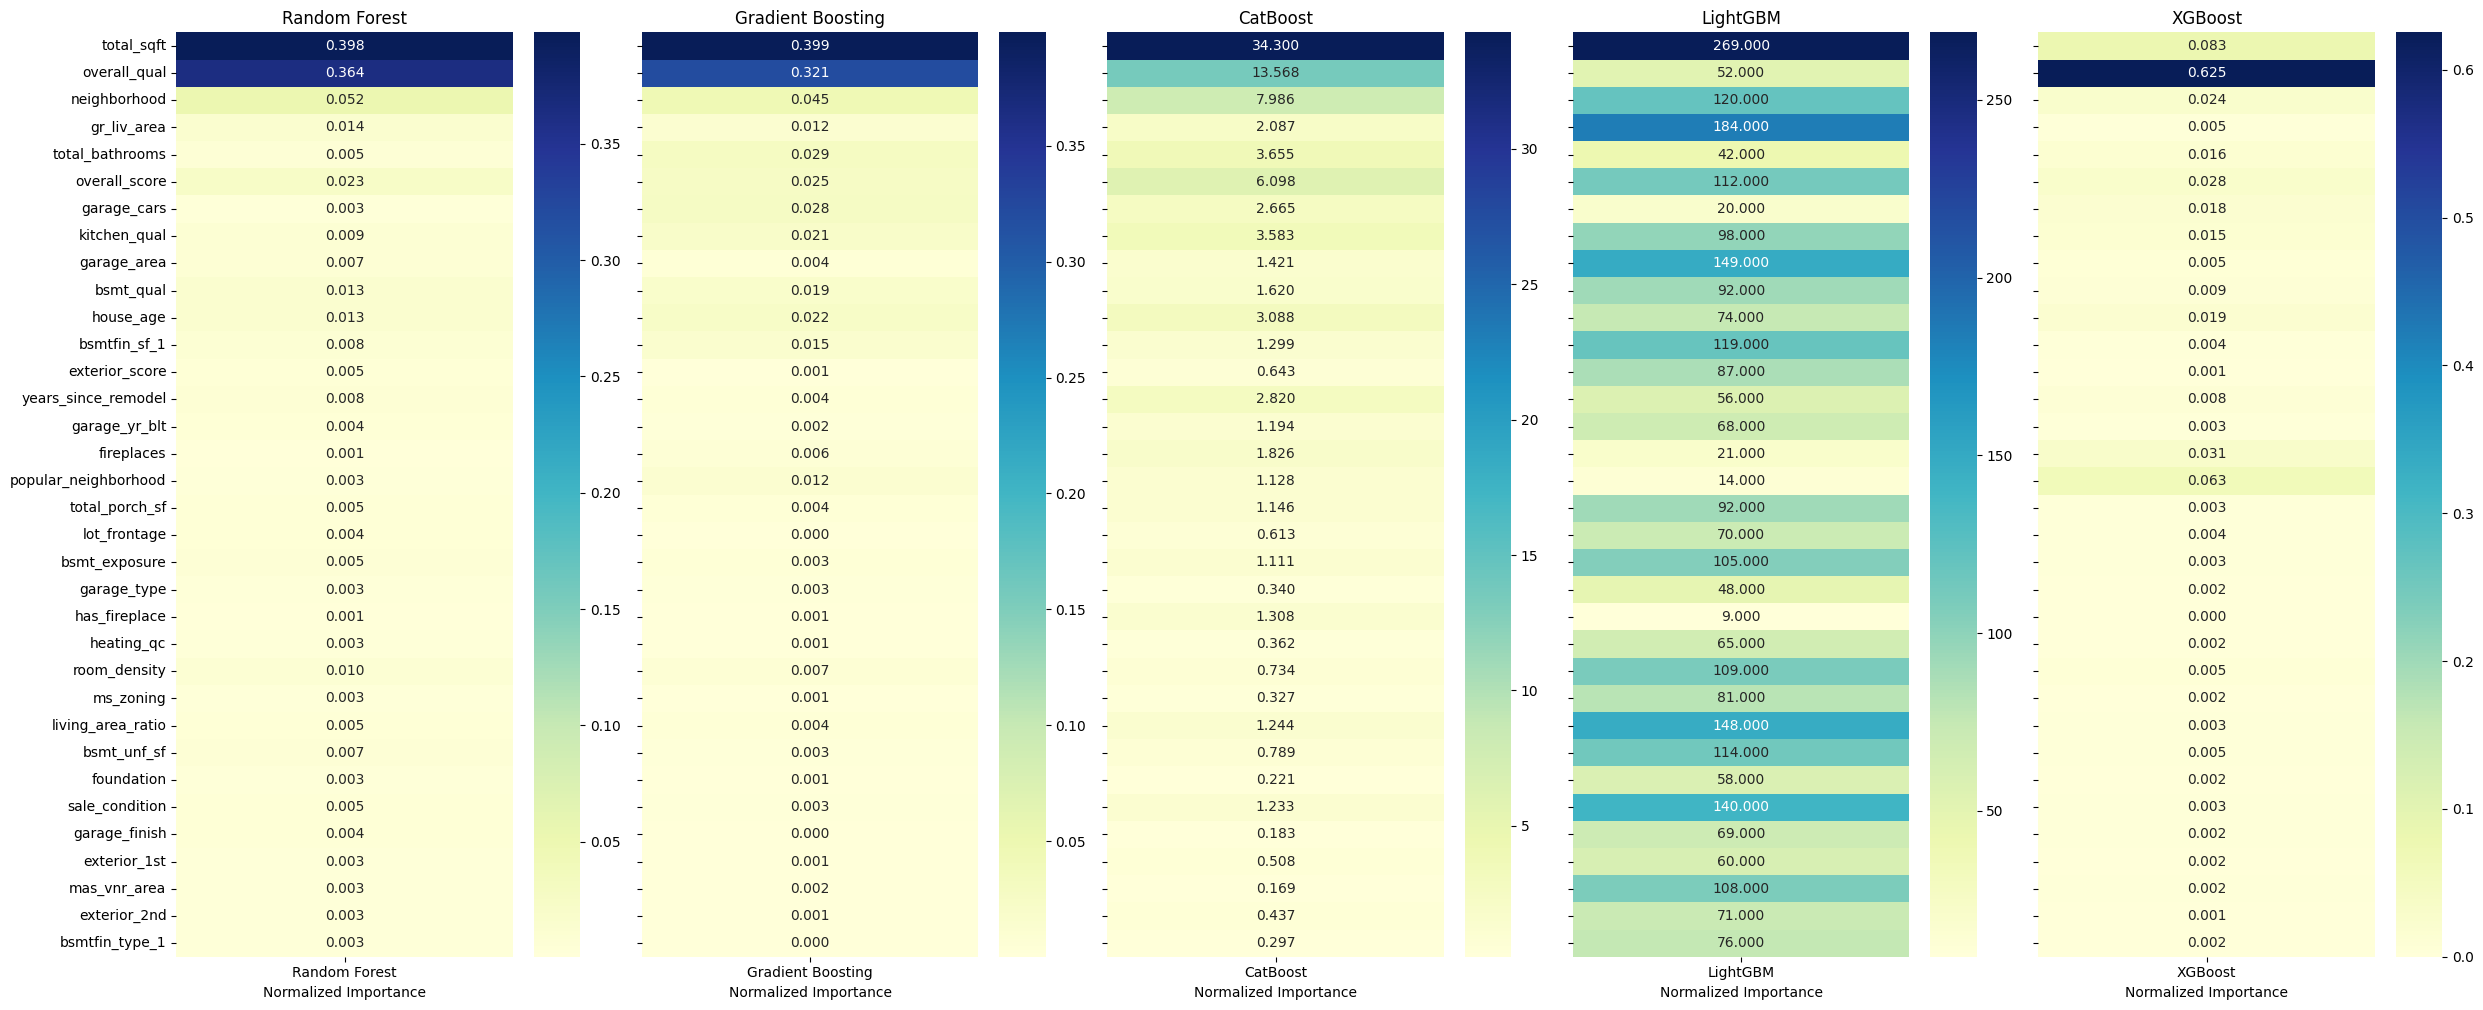

In [24]:
ms.plot_feature_importances(df.drop(columns=target).columns, importances_dict)

### Residuals Plot

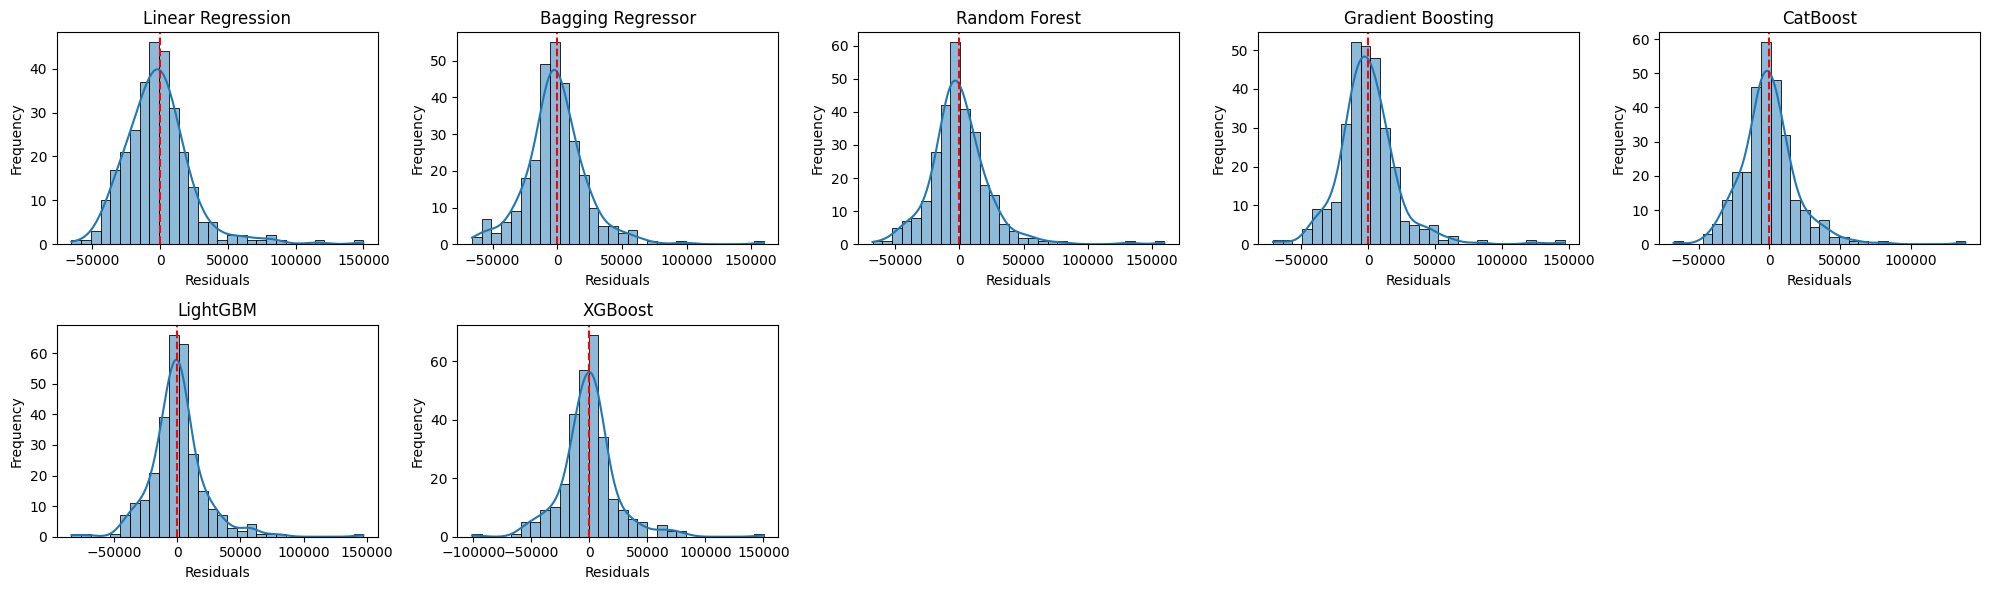

In [25]:
reload(ms)
ms.plot_residuals(y_test, predictions_dict, n_cols=5)

### Scatter Plot

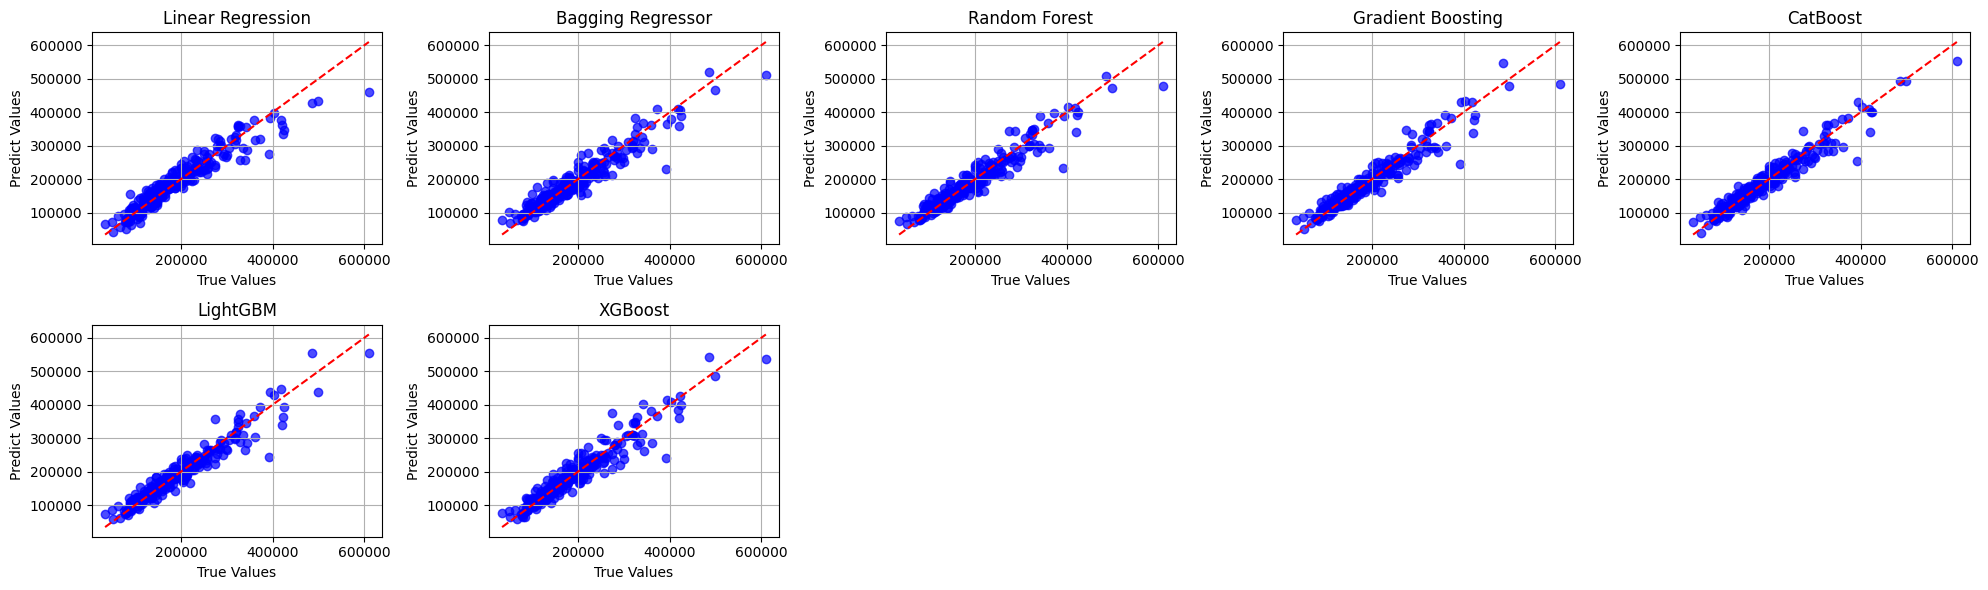

In [26]:
reload(ms)
ms.scatter_plot(y_test, predictions_dict, n_cols=5)

### Learning Curve

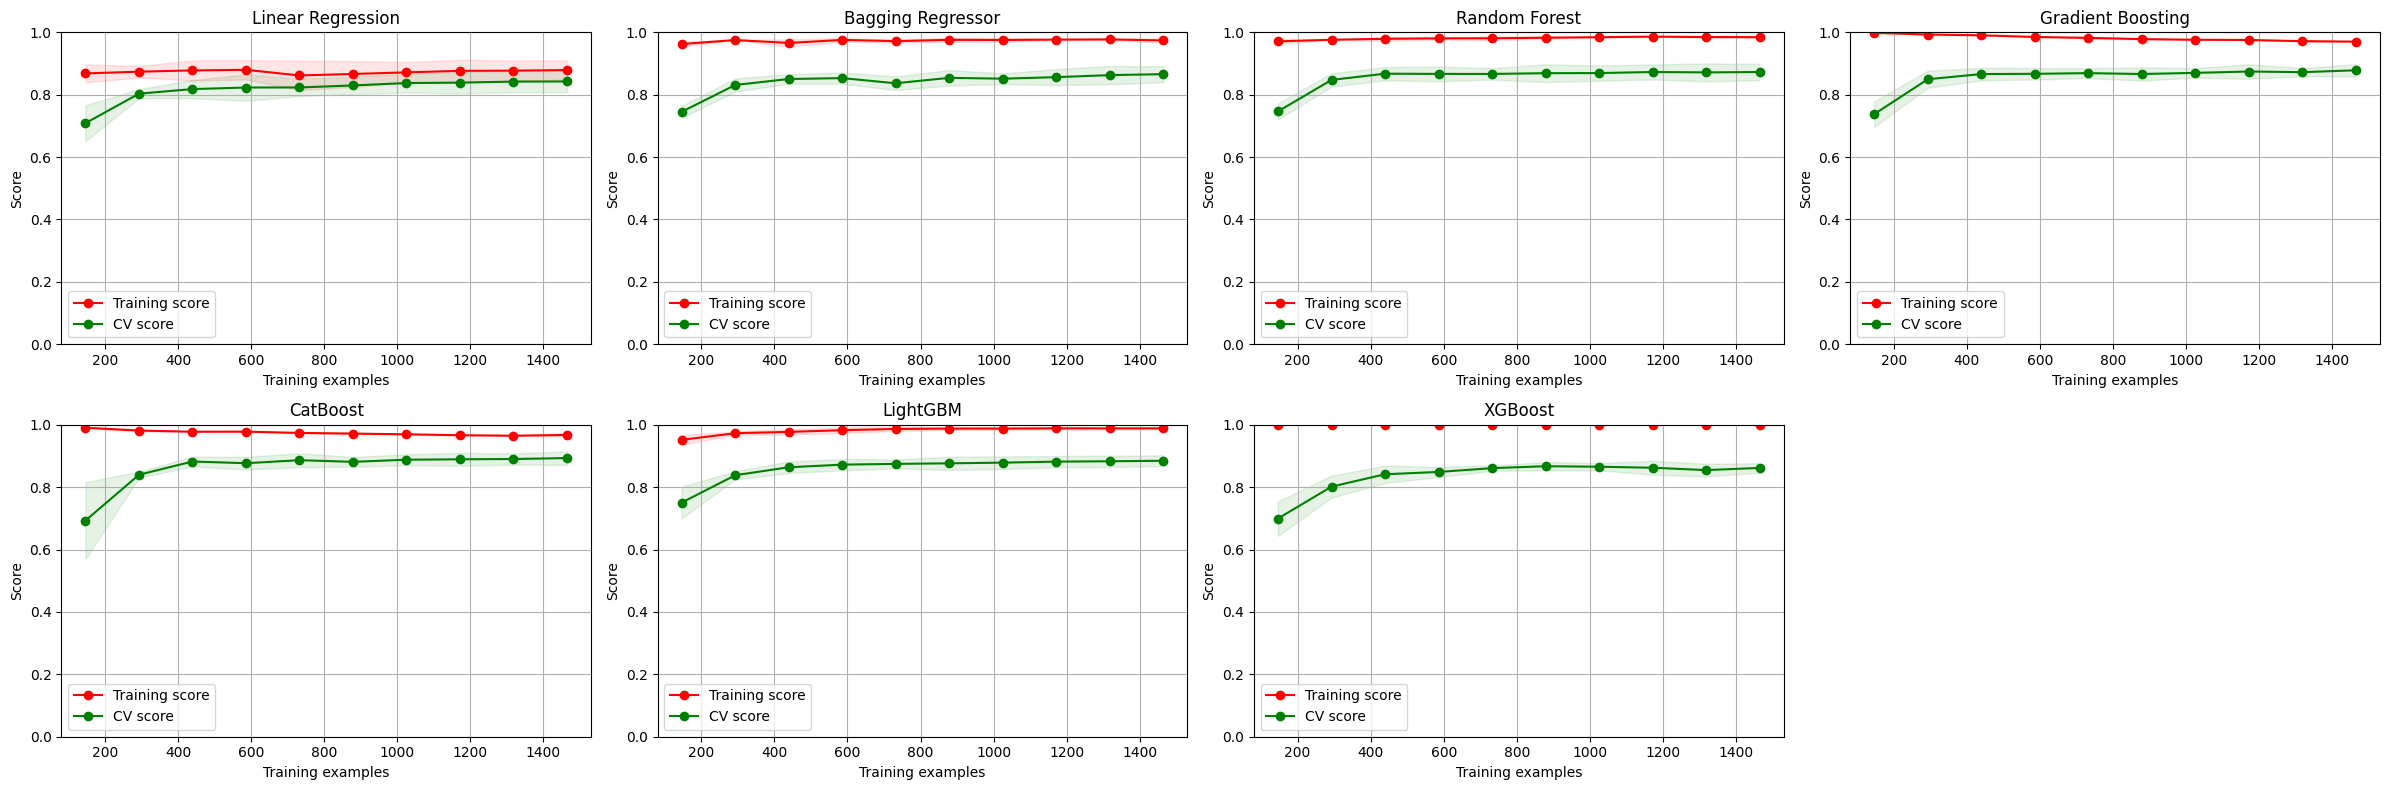

In [27]:
reload(ms)
learning_curve_summary = ms.learning_curves_regression(models, x, y, cv=2, scoring='r2', cols=4)

### Learning Curve Summary

In [28]:
learning_curve_summary

,Model,Train score,CV score,Gap,Best n_samples
0,Linear Regression,0.879065,0.842555,0.036510,1465
1,Bagging Regressor,0.973926,0.865880,0.108047,1465
2,Random Forest,0.984628,0.872780,0.111848,1172
3,Gradient Boosting,0.970162,0.878337,0.091825,1465
4,CatBoost,0.967580,0.893365,0.074215,1465
5,LightGBM,0.988717,0.884770,0.103947,1465
6,XGBoost,0.999913,0.861827,0.138086,879


### Best Model

In [29]:
models['CatBoost'].save_model("../models/catboost_model.cbm")